In [5]:
from keras.datasets import boston_housing

In [6]:
Train, Test = boston_housing.load_data()

In [7]:
XT, YT = Train
Xt, Yt = Test

In [8]:
print(XT.shape)
print(YT.shape)
print(Xt.shape)
print(Yt.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [9]:
mean = XT.mean(axis = 0)
std = XT.std(axis = 0)

# Data Noramlization
XT = (XT - mean)/std
Xt = (Xt - mean)/std

In [11]:
# Build Our Neural Network Problem
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from keras import backend as K

def r2_score(y_true, y_pred):
  
  #y_true = np.array(y_true)
  #y_pred = np.array(y_pred)
  
  num = K.sum(K.square(y_true-y_pred))
  denom = K.sum(K.square(y_true - K.mean(y_true)))
  return(1-num/denom)


def getModel():
  model = Sequential()
  model.add(Dense(64, activation = "relu", input_shape = (13, )))
  model.add(Dense(32, activation = "relu"))
  model.add(Dense(1))
  
  model.compile(optimizer = "adam", loss = "mse", metrics = [r2_score])
  
  return model

In [12]:
model = getModel()
model.summary()
hist = model.fit(XT, YT, verbose = 1, validation_data = (Xt, Yt) , epochs = 30)


W0710 21:18:17.927012  9108 deprecation_wrapper.py:119] From c:\users\ramesh\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0710 21:18:19.464736  9108 deprecation_wrapper.py:119] From c:\users\ramesh\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0710 21:18:19.991643  9108 deprecation_wrapper.py:119] From c:\users\ramesh\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0710 21:18:20.419402  9108 deprecation_wrapper.py:119] From c:\users\ramesh\appdata\local\programs\python\python37\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


W0710 21:18:21.934924  9108 deprecation_wrapper.py:119] From c:\users\ramesh\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0710 21:18:22.224754  9108 deprecation_wrapper.py:119] From c:\users\ramesh\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 404 samples, validate on 102 samples
Epoch 1/30
404/404 [==============================] - 5s 12ms/step - loss: 564.9519 - r2_score: -6.2921 - val_loss: 573.8828 - val_r2_score: -6.4806
Epoch 2/30
404/404 [==============================] - 0s 134us/step - loss: 526.3262 - r2_score: -5.7662 - val_loss: 530.3576 - val_r2_score: -5.9038
Epoch 3/30
404/404 [==============================] - 0s 171us/step - loss: 478.8175 - r2_score: -5.3946 - val_loss: 474.9684 - val_r2_score: -5.1730
Epoch 4/30
404/404 [==============================] - 0s 163us/step - loss: 417.8034 - r2_score: -4.3706 - val_loss: 402.0425 - val_r2_score: -4.2143
Epoch 5/30
404/404 [==============================] - 0s 186us/step - loss: 339.6009 - r2_score: -3.5646 - val_loss: 310.5359 - val_r2_score: -3.0157
Epoch 6/30
404/404 [==============================] - 0s 141us/step - loss: 247.7068 - r2_score: -2.2110 - val_loss: 212.5575 - val_r2_score: -1.7390
Epoch 7/30
404/404 [==============================] - 0

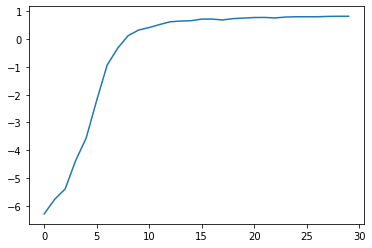

In [13]:
import matplotlib.pyplot as plt
plt.plot(hist.history["r2_score"])
plt.show()


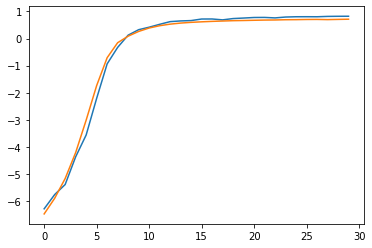

In [14]:
plt.plot(hist.history["r2_score"])
plt.plot(hist.history["val_r2_score"])

In [16]:
"""
plt.plot(r2_score_train , )
plt.plot(r2_score_val, label = "Val Score")

"""

'\nplt.plot(r2_score_train , )\nplt.plot(r2_score_val, label = "Val Score")\n\n'